# Author : Sai Krishna Jaligama
## Task 1: Prediction using Supervised Machine Learning
## Problem Statement: Predict the perecentage of the student based on the no. of hours student studied using Simple Linear Regression model which involves two variables. 

## Step 1: Importing the Libraries 

In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

## Step 2: Understanding the DataSet

In [2]:
# Loading the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported sucessfully")

Data imported sucessfully


In [3]:
# No. of rows and columns of in the dataset
df.shape

(25, 2)

In [4]:
# First 5 rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Statistical Details of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


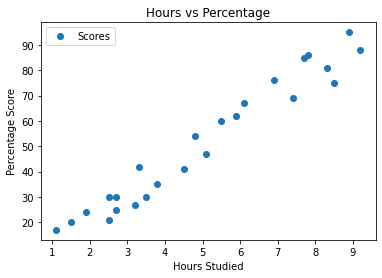

In [6]:
# Plotting the distribution of scores to unserstand the relation between the data.
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Step 3: Preperation of the Data

In [7]:
# Data is divided into attributes and labels
# X is independent variable and y is dependent variable
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [8]:
# Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
#We'll do this by using Scikit-Learn's built-in train_test_split() method:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

## Step 4: Training the algorithm

In [9]:
# The following code is used to train the model with Linear regression Algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


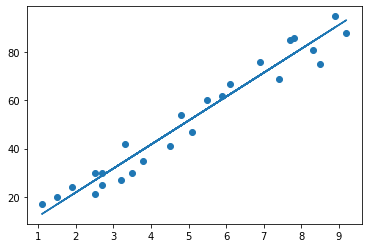

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [12]:
# Comparing Actual vs Predicted values
dataf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataf

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [14]:
# Testting the model to redict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


## Step 5: Evaluating the performance of the model

In [16]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


## Conclusion

###          We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 5). Here root mean squared error is less than 10% of the mean value of the percenttages of all the student scores. Hence, it is safe to conclue the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.